In [20]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing  #To have functions for scaling the data
import matplotlib.pyplot as plt

Importing the dataset

In [21]:
fifa = pd.read_csv('/home/anshul/Downloads/LaLigaFifa.csv')

In [22]:
fifa.head()

,Name,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,J. Oblak,13,11,15,29,13,12,13,14,26,...,11,55,14,12,18,84,90,77,87,84
1,S. Vrsaljko,82,44,69,74,53,74,70,57,70,...,52,67,77,81,75,15,11,10,10,12
2,J. Giménez,47,37,79,68,30,47,36,44,58,...,38,73,85,84,87,9,11,7,10,15
3,D. Godín,55,42,92,79,47,53,49,51,70,...,50,82,87,86,89,6,8,15,5,15
4,Filipe Luís,85,59,68,79,56,77,74,75,77,...,65,88,85,84,87,11,15,9,9,5


In [23]:
fifa.dtypes

Name                object
Crossing             int64
Finishing            int64
Heading Accuracy     int64
Short Passing        int64
Volleys              int64
Dribbling            int64
Curve                int64
FK Accuracy          int64
Long Passing         int64
Ball Control         int64
Acceleration         int64
Sprint Speed         int64
Agility              int64
Reactions            int64
Balance              int64
Shot Power           int64
Jumping              int64
Stamina              int64
Strength             int64
Long Shots           int64
Aggression           int64
Interceptions        int64
Positioning          int64
Vision               int64
Penalties            int64
Composure            int64
Marking              int64
Standing Tackle      int64
Sliding Tackle       int64
GK Diving            int64
GK Handling          int64
GK Kicking           int64
GK Positioning       int64
GK Reflexes          int64
dtype: object

In [26]:
attributes = fifa.loc[:, 'Crossing':'GK Reflexes'].copy()
attributes.head()

,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,13,11,15,29,13,12,13,14,26,16,...,11,55,14,12,18,84,90,77,87,84
1,82,44,69,74,53,74,70,57,70,78,...,52,67,77,81,75,15,11,10,10,12
2,47,37,79,68,30,47,36,44,58,56,...,38,73,85,84,87,9,11,7,10,15
3,55,42,92,79,47,53,49,51,70,76,...,50,82,87,86,89,6,8,15,5,15
4,85,59,68,79,56,77,74,75,77,81,...,65,88,85,84,87,11,15,9,9,5


In [27]:
scaled_data = preprocessing.scale(attributes)
print(scaled_data)

[[-2.22729332 -1.90476658 -2.1605849  ...  3.24487402  3.59969573
   3.32640066]
 [ 1.24543479 -0.37989804  0.64504731 ... -0.38411467 -0.37805922
  -0.27174583]
 [-0.51609397 -0.70335501  1.16460883 ... -0.5466067  -0.37805922
  -0.12182306]
 ...
 [-0.264447    0.12839147 -0.49798803 ... -0.27578665 -0.22308175
  -0.27174583]
 [-0.31477639 -0.51852246 -0.91363725 ... -0.32995066 -0.58469584
  -0.17179732]
 [-2.02597575 -1.58130962 -1.95276029 ...  3.08238199  2.77314925
   2.97658086]]


In [28]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

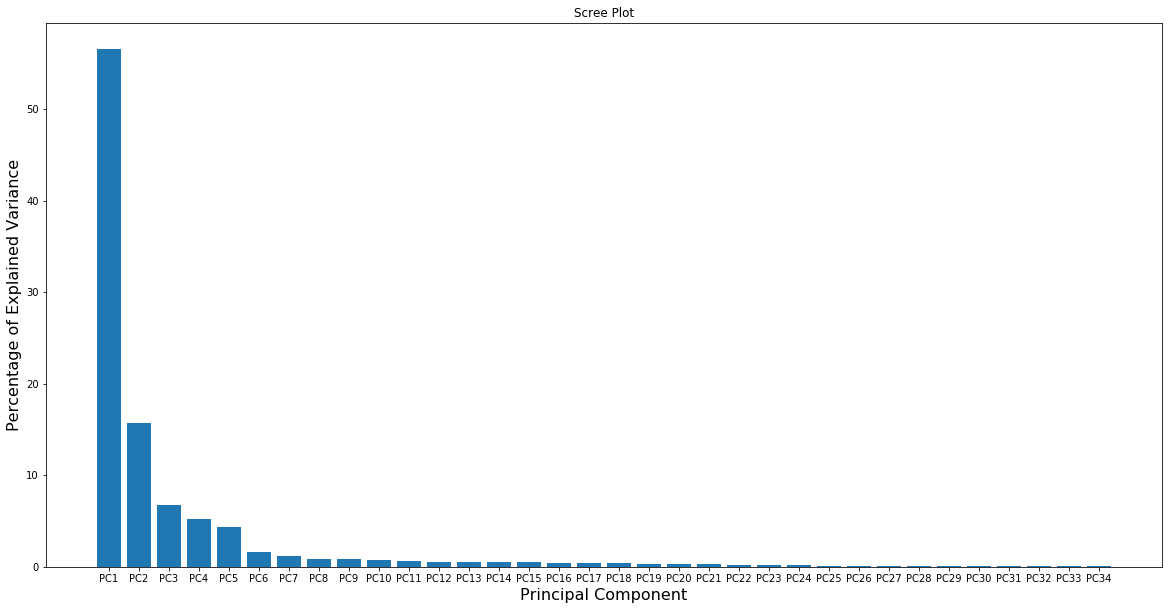

In [38]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals= 1)
plt.rcParams['figure.figsize'] = (20,10)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height = per_var, tick_label = labels,)
plt.ylabel('Percentage of Explained Variance', size = 16)
plt.xlabel('Principal Component', size = 16)
plt.title('Scree Plot')
plt.show()

In [46]:
pca_df = pd.DataFrame(pca_data, index = ['Name'] ,columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

ValueError: Shape of passed values is (34, 578), indices imply (34, 1)

In [45]:
?pd.DataFrame()